# 03 Era Breakdown

Quick visuals to inspect how pace and shooting efficiency evolve across the configured era segments.

In [5]:
"""Utility cell to ensure the project root is on the Python path when the notebook is opened from the `notebooks/` directory."""
import sys
from pathlib import Path

PROJECT_ROOT = Path.cwd().resolve().parent
if str(PROJECT_ROOT) not in sys.path:
    sys.path.append(str(PROJECT_ROOT))
PROJECT_ROOT

PosixPath('/Users/ameya/Documents/University/HW/CSE572/nba-stats')

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.era import summarize_by_era

sns.set_theme(style="whitegrid")

team_csv = PROJECT_ROOT / "data" / "processed" / "team_season_regular.csv"
era_csv = PROJECT_ROOT / "data" / "processed" / "team_era_regular.csv"

team_summary = pd.read_csv(team_csv)
era_summary = pd.read_csv(era_csv)

season_pace = (
    team_summary.groupby(["SEASON_YEAR", "ERA_LABEL"], dropna=False)
    .agg(mean_pace=("PACE", "mean"), median_three_rate=("THREE_POINT_RATE", "median"))
    .reset_index()
)

era_totals = summarize_by_era(team_summary)
team_summary.head()

,TEAM_ID,SEASON_YEAR,IS_PLAYOFFS,PACE,OFF_EFF_PER_100,DEF_EFF_PER_100,THREE_POINT_RATE,AST_TOV_RATIO,TOTAL_EST_POSSESSIONS,WIN_PCT,GAMES_PLAYED,ERA_KEY,ERA_LABEL,ERA_START_YEAR,ERA_END_YEAR
0,12304,2006,False,75.898936,137.024318,130.436611,0.303797,NaN,75.898936,1.0,1,pace_and_space_rise,Pace-and-Space Rise,2005,2013.0
1,12321,2012,False,88.874291,109.142925,102.391816,0.269231,1.0000,88.874291,1.0,1,pace_and_space_rise,Pace-and-Space Rise,2005,2013.0
2,12321,2013,False,85.440470,95.973255,111.188527,0.411765,0.8125,85.440470,0.0,1,pace_and_space_rise,Pace-and-Space Rise,2005,2013.0
3,1610610024,1947,False,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1,pre_shot_clock,Early BAA/NBL,1946,1953.0
4,1610610029,1948,False,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,pre_shot_clock,Early BAA/NBL,1946,1953.0


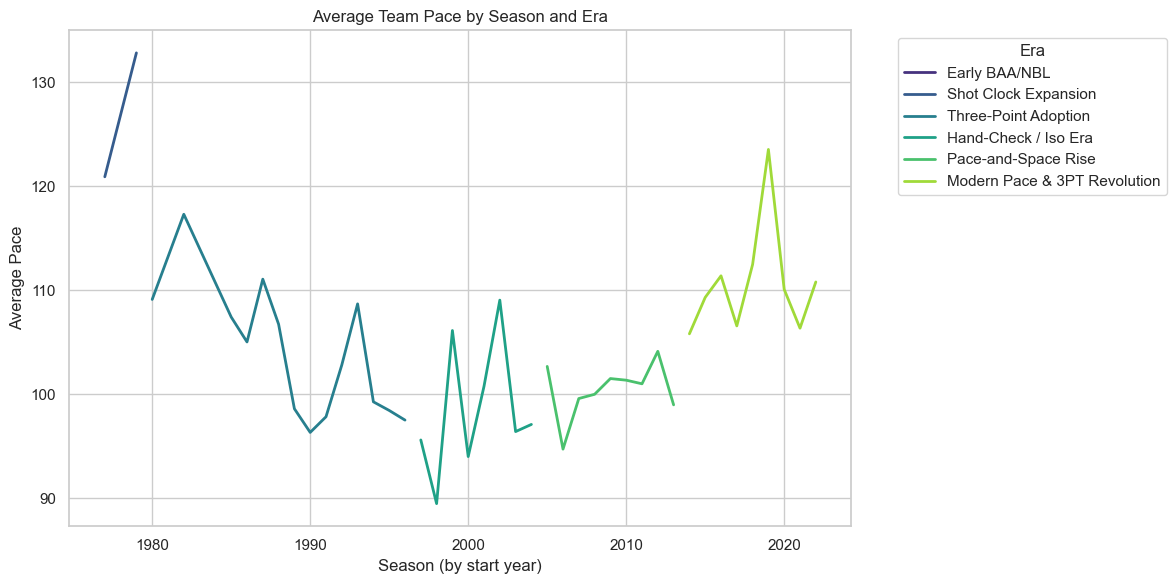

In [7]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(
    data=season_pace,
    x="SEASON_YEAR",
    y="mean_pace",
    hue="ERA_LABEL",
    palette="viridis",
    linewidth=2.0,
    ax=ax,
)
ax.set_title("Average Team Pace by Season and Era")
ax.set_xlabel("Season (by start year)")
ax.set_ylabel("Average Pace")
ax.legend(title="Era", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

/var/folders/z3/q7l4vnn50b3fl39z63gdsxwc0000gn/T/ipykernel_57663/2235766885.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/z3/q7l4vnn50b3fl39z63gdsxwc0000gn/T/ipykernel_57663/2235766885.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")


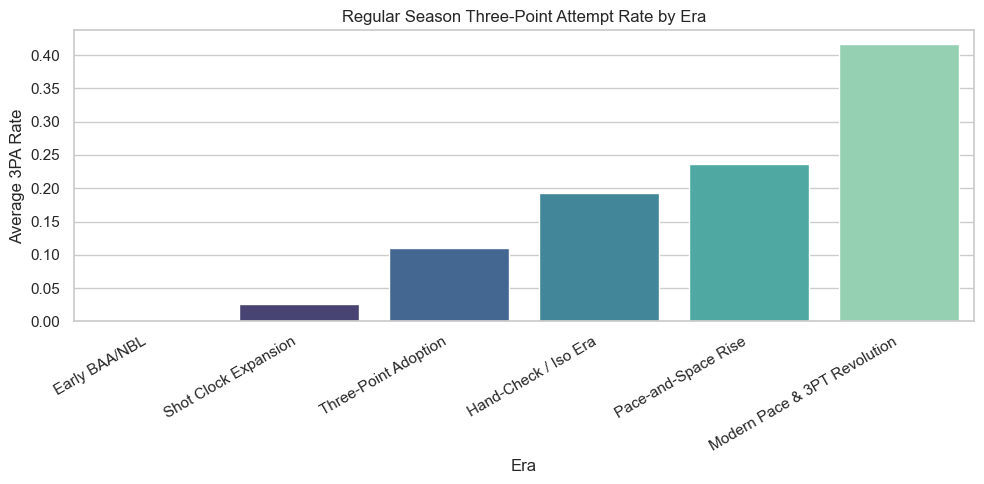

In [8]:
fig, ax = plt.subplots(figsize=(10, 5))
order = era_totals.sort_values("ERA_START_YEAR")["ERA_LABEL"].unique()
sns.barplot(
    data=era_totals[era_totals["IS_PLAYOFFS"] == False],
    x="ERA_LABEL",
    y="THREE_POINT_RATE",
    order=order,
    palette="mako",
    ax=ax,
)
ax.set_title("Regular Season Three-Point Attempt Rate by Era")
ax.set_xlabel("Era")
ax.set_ylabel("Average 3PA Rate")
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
plt.tight_layout()
plt.show()